<a href="https://colab.research.google.com/github/JustAlex5/kaman_filter/blob/main/kalman_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alex Kovalyov 


In [1]:
#import libraries
import numpy as np

In [2]:
delta_t=1
feet_coefficient=0.3048


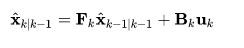

In [3]:
def get_prdict_state(F,Xk):
  return F*Xk

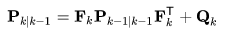

In [4]:
def get_predict_estimate(F,P):
  return F*P*F.transpose()

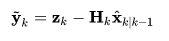

In [5]:
def get_measurement(Zk,H,Xk_predict):
  return Zk-H*Xk_predict

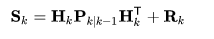

In [6]:
def get_covariance(H,P_predict,R):
  return H*P_predict*H.transpose()+R

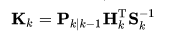

In [7]:
def get_kalman_gain(P_predict,H,Sk): 
  return P_predict*H.transpose()*np.linalg.inv(Sk)

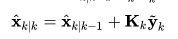

In [8]:
def update_state_estimate(Xk_predict,KG,Yk):
  return Xk_predict+KG*Yk

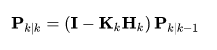

In [9]:
def update_estimate_covariance(KG,H,P_predict):
  KH=KG*H
  return (np.identity(KH.shape[0])-KH)*P_predict

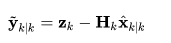

In [10]:
def measurment_post_fit(Zk,H,Xkk):
  return Zk-H*Xkk

##**Ex1**

In [11]:
Xk=np.matrix(([8],[5]))

In [12]:
inaccuracy_p=2
inaccuracy_v=1.2
P=np.matrix(([np.square(inaccuracy_p),0],[0,np.square(inaccuracy_v)]))

In [13]:
sensor_inaccuracy_p=0.5
R=np.matrix(([np.square(sensor_inaccuracy_p)]))

In [14]:
F=np.matrix(([1,delta_t],[0,1]))

In [15]:
Zk=np.matrix(([43]))

In [16]:
H=np.matrix(([1/feet_coefficient,0]))

## Predict

In [17]:
Xk_predict=get_prdict_state(F,Xk)
P_predict=get_predict_estimate(F,P)

# **Update**

In [18]:
Yk= get_measurement(Zk,H,Xk_predict)
Sk=get_covariance(H,P_predict,R)
KG=get_kalman_gain(P_predict,H,Sk)
Xkk=update_state_estimate(Xk_predict,KG,Yk)
Pkk=update_estimate_covariance(KG,H,P_predict)
Ykk=measurment_post_fit(Zk,H,Xkk)

In [19]:
print("observation:",H)
print("\n")
print("estimate:\n",P)
print("\n")
print("state-transition:\n",F)
print("\n")
print("Optimal Kalman Gain:\n",KG)

observation: [[3.2808399 0.       ]]


estimate:
 [[4.   0.  ]
 [0.   1.44]]


state-transition:
 [[1 1]
 [0 1]]


Optimal Kalman Gain:
 [[0.30350421]
 [0.08033935]]


In [20]:
print("Updated state estimate: \n",Xkk)
print("\n")
print("Updated estimate covariance:\n",Pkk)

Updated state estimate: 
 [[13.10594766]
 [ 5.02804497]]


Updated estimate covariance:
 [[0.02312702 0.00612186]
 [0.00612186 1.06044402]]


# **EX2**

In [21]:
Xk=np.matrix(([8],[5]))

In [22]:
inaccuracy_p=2
inaccuracy_v=1.2
P=np.matrix(([np.square(inaccuracy_p),0],[0,np.square(inaccuracy_v)]))

In [23]:
sensor_inaccuracy_p=0.5
senspr_inaccuracy_v=4
R=np.matrix(([np.square(sensor_inaccuracy_p),0],[0,np.square(senspr_inaccuracy_v)]))

In [24]:
F=np.matrix(([1,delta_t],[0,1]))

In [25]:
Zk=np.matrix(([43],[4]))

In [26]:
H=np.matrix(([1/feet_coefficient,0],[0,1]))

In [27]:
Xk_predict=get_prdict_state(F,Xk)
P_predict=get_predict_estimate(F,P)

In [28]:
Yk= get_measurement(Zk,H,Xk_predict)
Sk=get_covariance(H,P_predict,R)
KG=get_kalman_gain(P_predict,H,Sk)
Xkk=update_state_estimate(Xk_predict,KG,Yk)
Pkk=update_estimate_covariance(KG,H,P_predict)
Ykk=measurment_post_fit(Zk,H,Xkk)

In [29]:
print("observation:",H)
print("\n")
print("estimate:\n",P)
print("\n")
print("state-transition:\n",F)
print("\n")
print("Optimal Kalman Gain:\n",KG)

observation: [[3.2808399 0.       ]
 [0.        1.       ]]


estimate:
 [[4.   0.  ]
 [0.   1.44]]


state-transition:
 [[1 1]
 [0 1]]


Optimal Kalman Gain:
 [[0.30347538 0.00035883]
 [0.07534561 0.06215806]]


In [30]:
print("Updated state estimate: \n",Xkk)
print("\n")
print("Updated estimate covariance:\n",Pkk)

Updated state estimate: 
 [[13.10557877]
 [ 4.96414369]]


Updated estimate covariance:
 [[0.02312482 0.00574134]
 [0.00574134 0.99452888]]
